## Polization standing waves


A Jupyter Notebook containing this code

Pol_SW.ipynb 

can be downloaded from

https://github.com/opticsf2f/Opticsf2f_CodeBook

The code make plots of polarization states arising in standing waves. We consider counter-propagating beams propagating
along the $z$ axis. There are four cases of interest:
    
(i) parallel linear (both beams linearly polarized say along the $y$ axis),

(ii) orthogonal linear (one beams linearly polarized along $y$ and the counter propagating beam linearly polarized along $x$,

(iii) identical circular,
                        
(iv) orthogonal circular.
                        
                        
As the polarization state varies with position we plot the electric field at all times up to one period at different position.

We use colour intensity to represent time. Early times fade to white. Recent times are a single colour 
(red, green or blue, for right circular, linear, and left circular respectively).
                        
The physics part of the code is simple. We just add fields of the form
                        
$${\cal E}_{x,y} = {\cal E}_0 \cos [ 2\pi (\pm z-c t)/\lambda +\phi ]~,$$
                        
with an appropriate choice of propagation direction, $\pm z$, components ${\cal E}_{x,y}$ and relative phase $\phi$. 

We set $\lambda = 1$ so space dimensions are measuremed in units of the wavelength.

Also $c=1$.
    
<div class="interactive-start" onclick="initInteractiveCode()" title="This runs Python in your browser, allowing you local calculations">CLICK HERE TO ACTIVATE CODE CELLS</div>            

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import matplotlib.gridspec as gridspec

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex = True)

The next cell define a function for the electric field, and some things we need to make 3D axes.

In [2]:
def E(z,t,phi):    
    return np.cos(2*np.pi*(z - t) + phi)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

def DrawAxes(ax=None, **kwargs):
    ax = ax or plt.gca()
    a = Arrow3D( [0, 0], [0, 0], [-0.02, 3.5], mutation_scale=5, mutation_aspect = 5,
                    lw=2, arrowstyle="-|>", color="black")
    ax.add_artist(a)
    a = Arrow3D( [0, 0], [-0.0, 4.5], [0, 0], mutation_scale=10, mutation_aspect = 1,
                    lw=2, arrowstyle="-|>", color="black")
    ax.add_artist(a)
    a = Arrow3D( [-0.01, 1.2], [0.0, 0.0], [0, 0], mutation_scale=10, mutation_aspect = 1,
                    lw=2, arrowstyle="-|>", color="black")
    ax.add_artist(a)
    y_off = -2.8
    
    ax.text(0, 4.5, 0.15, '$x$', fontsize =24)
    ax.text(0, 0.3, 3.0,  '$y$', fontsize =24)
    ax.text(1.2, 0.2, 0, '$z$', fontsize =24)
    ax.text(-0.025, -0.0, y_off, r'$0$', fontsize =24)
    ax.text(0.2, -0.0, y_off, r'$\textstyle{1\over 4}\lambda$', fontsize =24)
    ax.text(0.45, -0.0, y_off, r'$\textstyle{1\over 2}\lambda$', fontsize =24)
    ax.text(0.7, -0.0, y_off, r'$\textstyle{3\over 4}\lambda$', fontsize =24)
    ax.text(0.98, -0.0, y_off, r'$\lambda$', fontsize =24)

    ax.set_xlim(-0.2,1.2)
    ax.set_ylim(-1.0,1.0)
    ax.set_zlim(-1.0,1.0)
    ax.view_init(elev=20, azim=-75)
    ax.set_box_aspect(aspect = (4,1,1))
    ax.set_axis_off()
    return ax

Now we plot the four cases described above. Note how we use 

c = t

for the colour of the points in scatter3D. This maps time onto the colormap.

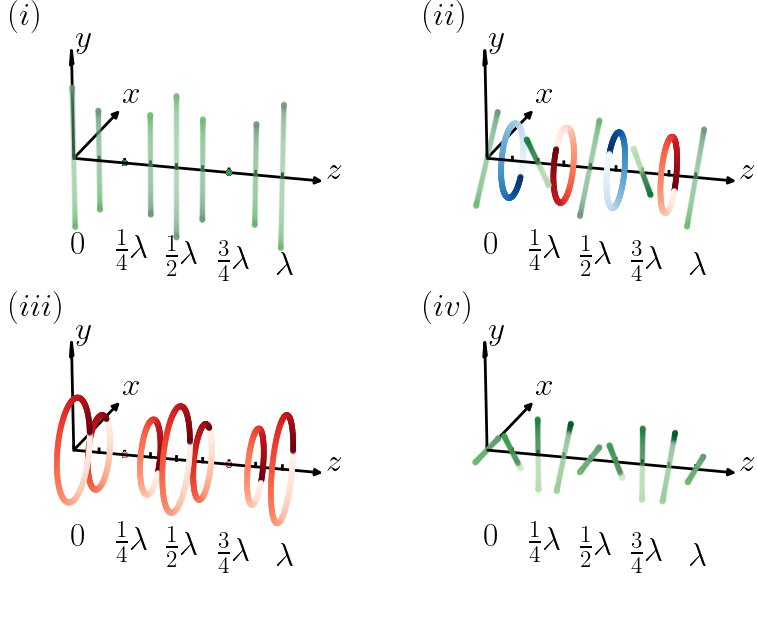

In [3]:
fig = plt.figure(figsize=(16,8)) # portrait
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,3, projection='3d')
ax3 = fig.add_subplot(2,2,2, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')

n_pts = 400
pos = np.linspace(0,1.0,9)

DrawAxes(ax1)
for jj in pos:   
    z = jj*np.ones(n_pts)
    t = np.linspace(0.0,1.0,n_pts)
    Ex = 0.0*(E(z,t,0) + E(-z,t,0))
    Ey = 1.0*(E(z,t,0) + E(-z,t,0))
    ax1.scatter3D(z,Ex,Ey,c = t, cmap = 'Greens', s = 10, alpha = 0.05)
    ax1.plot([jj,jj],[0,0],[0,0.1],linewidth=2,  color="black")
ax1.text(-0.3, 0, 3.6,  '$(i)$', fontsize =24)

DrawAxes(ax4)
for jj in pos:   
    z = jj*np.ones(n_pts)
    t = np.linspace(0.0,1.0,n_pts)
    Ex = 1.0*np.cos(jj*2*np.pi)*E(z,t,0)
    Ey = 1.0*np.sin(jj*2*np.pi)*E(z,t,np.pi)
    ax4.scatter3D(z,Ex,Ey,c = t, cmap = 'Greens', s = 10, alpha = 0.05)
    ax4.plot([jj,jj],[0,0],[0,0.1],linewidth=2,  color="black")
ax4.text(-0.3, 0, 3.6,  '$(iv)$', fontsize =24)

DrawAxes(ax3)
for jj in pos:   
    z = jj*np.ones(n_pts)
    t = np.linspace(0.0,1.0,n_pts)
    Ex = E(z,t,0)
    Ey = E(z,t,jj*4*np.pi)
    if (jj == 0) | (jj == 0.25) | (jj == 0.5) | (jj == 0.75) | (jj == 1.0):
        ax3.scatter3D(z,Ex,Ey,c = t, cmap = 'Greens', s = 10, alpha = 0.05)
    if (jj == 0.125) | (jj == 0.625) :
        ax3.scatter3D(z,Ex,Ey,c = t, cmap = 'Blues', s = 10, alpha = 0.6)
    if (jj == 0.375) | (jj == 0.875):
        ax3.scatter3D(z,Ex,Ey,c = t, cmap = 'Reds', s = 10, alpha = 0.6)
#    ax3.scatter3D(z,Ex,Ey,c = t, cmap = 'Blues', s = 10, alpha = 0.6)
    ax3.plot([jj,jj],[0,0],[0,0.1],linewidth=2,  color="black")
ax3.text(-0.3, 0, 3.6,  '$(ii)$', fontsize =24)

DrawAxes(ax2)
for jj in pos:
    z = jj*np.ones(n_pts)
    t = np.linspace(0.0,1.0,n_pts)
    Ex = np.sqrt(2.0)*np.cos(jj*2*np.pi)*E(z,t,0)
    Ey = np.sqrt(2.0)*np.cos(jj*2*np.pi)*E(z,t,-np.pi/2)
    ax2.scatter3D(z,Ex,Ey,c = t, cmap = 'Reds', s = 10, alpha = 0.6)
    ax2.plot([jj,jj],[0,0],[0,0.1],linewidth=2,  color="black")
ax2.text(-0.3, 0, 3.6,  '$(iii)$', fontsize =24)


fig.subplots_adjust(hspace=-0.1)
fig.subplots_adjust(wspace=-0.5)

In [96]:
fig.savefig('Pol_SW_space_time.png', dpi=300, facecolor='white', edgecolor='white')